# IMOS historical wave data

:::{important}
Access to historical records is important to 
* evaluate global and local impacts of climate change & anthropogenic influences and 
* test and validate models. In the modelling area, this kind of approach is done  routinely to evaluate models performances (hindcast models).
:::

Here we will see how we can query historical data from a buoy located offshore Sydney. 


```{figure} ../_static/mhl.png
---
figclass: margin
name: margin_figure24
---
```

Our dataset is available from: 

+ [IMOS Data Portal](http://imos.org.au) and has been recorded by the [**Manly Hydraulics Laboratory**](https://mhl.nsw.gov.au):
+ [dataset link](http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/)

We will use the **netCDF** libary ([Network Common Data Form](http://www.unidata.ucar.edu/netcdf/)).

As we saw in previous examples, this library is a set of self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. The project homepage is hosted by the **Unidata** program at the University Corporation for Atmospheric Research (**UCAR**).

Loading a module is straight forward:

In [13]:
%matplotlib inline
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd
import cftime

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

## 2015 Waverider Buoy dataset

We will use a dataset containing ocean wave data from wave monitoring buoy moored off Sydney at latitude 33$^o$46'26" S, longitude 151$^o$24'42" E and water depth 90 metres.  

<a href='https://s3-ap-southeast-2.amazonaws.com/imos-data/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/Sydney_Waverider_Buoy_location_history.pdf'> Sydney Waverider Buoy location history</a>


:::{admonition} Where is the data coming from?
:class: toggle, note

The data is gathered using the Directional Waverider system developed by the Dutch company, Datawell. 

The Directional Waverider buoy utilises a heave-pitch-roll sensor, two fixed X and Y accelerometers and a three axis fluxgate compass to measure both vertical and horizontal motion.  

An on-board processor converts the buoy motion to three orthogonal (vertical, north-south, east-west) translation signals that are transmitted to the shore station.  The directional spectrum is also routinely transmitted to the receiving station for further processing.  

The wave data is stored on the receiving station PC before routine transfer to *Manly Hydraulics Laboratory*.

:::

In [3]:
# Offshore Sydney buoy data
url_sydney = 'http://thredds.aodn.org.au/thredds/dodsC/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/IMOS_ANMN-NSW_W_20150210T230000Z_WAVESYD_WAVERIDER_FV01_END-20171231T130000Z.nc'
    
# Offshore Batemans Bay buoy data
#url_batemans = 'http://thredds.aodn.org.au/thredds/dodsC/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Batemans_Bay/IMOS_ANMN-NSW_W_20080124T210000Z_WAVEBAB_WAVERIDER_FV01_END-20151231T130000Z.nc'

# Offshore Byron Bay buoy data
#url_byron = 'http://thredds.aodn.org.au/thredds/dodsC/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Byron_Bay/IMOS_ANMN-NSW_W_20140529T010000Z_WAVEBYB_WAVERIDER_FV01_END-20171231T130000Z.nc'

nc_data=netCDF4.Dataset(url_sydney)


## Query dataset

Let have a look at the loaded netCDF variables

In [4]:
nc_data.variables.keys()

odict_keys(['TIME', 'TIMESERIES', 'LATITUDE', 'LONGITUDE', 'WHTH', 'WMSH', 'HRMS', 'WHTE', 'WMXH', 'TCREST', 'WPMH', 'WPTH', 'YRMS', 'WPPE', 'TP2', 'M0', 'WPDI'])

In [5]:
print(nc_data.variables['TIME'])

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    long_name: time
    standard_name: time
    units: days since 1950-01-01 00:00:00 UTC
    calendar: gregorian
    valid_max: 999999.0
    axis: T
    valid_min: 0.0
unlimited dimensions: 
current shape = (23382,)
filling off


## Find out time interval record

Get the time extension of the gathered data...

In [6]:
units = nc_data.variables['TIME'].units
calendar = nc_data.variables['TIME'].calendar

times = netCDF4.num2date(nc_data.variables['TIME'][:], units=units, calendar=calendar)

In [7]:
start = dt.datetime(1985,1,1)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime = netCDF4.date2index(start,time_var,select='nearest')
dtime = netCDF4.num2date(time_var[itime],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')

print('buoy record start time:',daystr)

buoy record start time: 2015-Feb-10 23:00


In [8]:
end = dt.datetime(2018,1,1)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime2 = netCDF4.date2index(end,time_var,select='nearest')
dtime2 = netCDF4.num2date(time_var[itime2],time_var.units)
dayend = dtime2.strftime('%Y-%b-%d %H:%M')

print('buoy record end time:',dayend)

buoy record end time: 2017-Dec-31 13:00


In [9]:
print('Records per day:')
for k in range(1,25):
    print(netCDF4.num2date(time_var[k],time_var.units))

Records per day:
2015-02-11 00:00:00
2015-02-11 01:00:00
2015-02-11 02:00:00
2015-02-11 03:00:00
2015-02-11 04:00:00
2015-02-11 05:00:00
2015-02-11 06:00:00
2015-02-11 07:00:00
2015-02-11 08:00:00
2015-02-11 09:00:00
2015-02-11 10:00:00
2015-02-11 11:00:00
2015-02-11 12:00:00
2015-02-11 13:00:00
2015-02-11 14:00:00
2015-02-11 15:00:00
2015-02-11 16:00:00
2015-02-11 17:00:00
2015-02-11 18:00:00
2015-02-11 19:00:00
2015-02-11 20:00:00
2015-02-11 21:00:00
2015-02-11 22:00:00
2015-02-11 23:00:00


## Buoy location

Check the location of the data

In [10]:
loni = nc_data.variables['LONGITUDE'][:]
lati = nc_data.variables['LATITUDE'][:]
print(loni,lati)
names=[]
names.append('Offshore Sydney Buoy')

151.41167 -33.77389


## Visualise buoy records

Export for the historical time serie, the desired buoy variables, here we use HRMS:

In [11]:
times = nc_data.variables['TIME']
jd_data = netCDF4.num2date(times[:],times.units, only_use_cftime_datetimes=False, 
                           only_use_python_datetimes=True).flatten()
hm_data = nc_data.variables['HRMS'][:].flatten()
#T_data = ???

Now plot the exported dataset

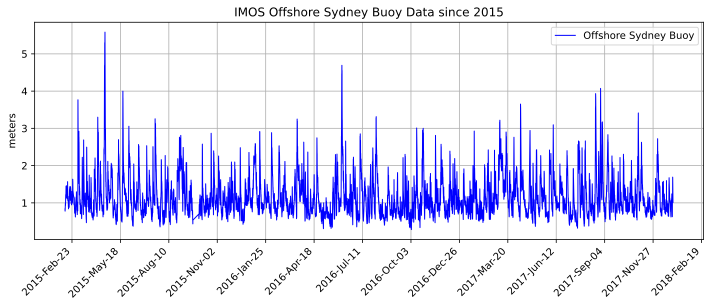

In [19]:
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(111)

ax1.plot(jd_data[itime:itime2], hm_data[itime:itime2], linewidth=1, color='blue') 

ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO,interval=12))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)

setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('IMOS Offshore Sydney Buoy Data since 2015')
ax1.set_ylabel('meters')
ax1.legend(names,loc='upper right')

fig.show()

## April 2015 storm

````{margin}
```{seealso}
SMH: [Storm of the century batters Sydney and the Hunter, leaving three dead and homes destroyed](https://www.smh.com.au/environment/weather/storm-of-the-century-batters-sydney-and-the-hunter-leaving-three-dead-and-homes-destroyed-20150421-1mq76b.html)
```
````


```{eval-rst}
.. figure:: https://i.guim.co.uk/img/media/643dfa81d4bbca129906d8a26c683e3e6901c053/0_110_3000_1801/3000.jpg?w=1010&q=55&auto=format&usm=12&fit=max&s=6dac931858af8c21404a5604900ae71d
    :width: 80 %
    :alt:  A man fools around in the wind at Bondi Beach, Sydney, on April 21 2015.
    :align: center

    Turquoise Bay
```

To find the temporal `id` of the storm we use the python function `argmax`:

In [18]:
idmax = hm_data[itime:itime2].argmax()
print('Temporal ID of the strom:',idmax)
print('Corresponding date:',jd_data[idmax])

Temporal ID of the strom: 1595
Corresponding date: 2015-04-21 06:00:00


## Plotting variables 

Set the wave height RMS 48h before and after the recorded maximum wave height RMS time.

In [13]:
storm_time = ???
storm_hrms = ???
storm_period = ???

SyntaxError: invalid syntax (<ipython-input-13-fe94d0bdf1fd>, line 1)

NameError: name 'storm_time' is not defined

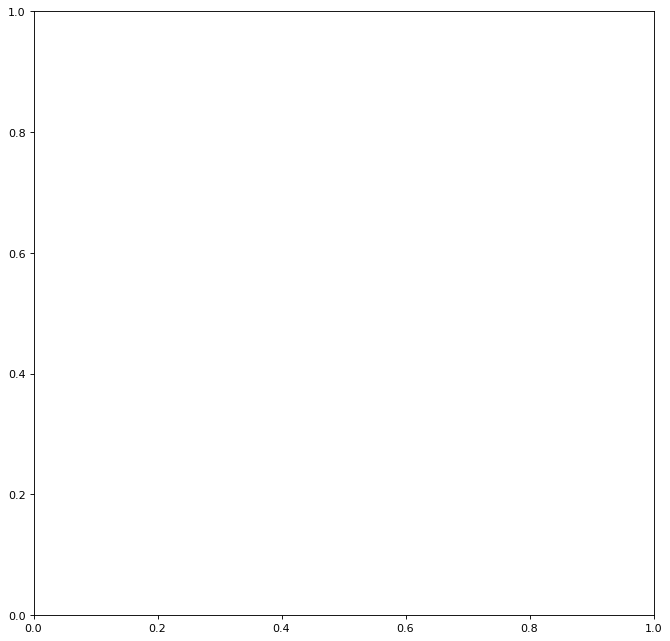

In [14]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_hrms,linewidth=4) 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('meters')
names = ['HRMS']
ax1.legend(names,loc='upper right')

## Wave power and energy

- Wave power:

$$
P = \frac{\rho g^2}{64 \pi} H_{mo}^2 T \simeq 0.5 H_{mo}^2 T
$$

- Wave energy:

$$
E = \frac{1}{16}\rho g H_{mo}^2
$$

:::{note}
You can define $\pi$ using `np.pi`.
:::

### Define the functions

In [ ]:
def wave_power(rho,g,h,t):
    power = ???
    return power

def wave_energy(rho,g,h):
    energy = ???
    return energy

In [ ]:
storm_power = wave_power(???)
storm_energy = wave_energy(???)

### Plot the data over the storm duration

In [ ]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(???,???,linewidth=4) 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('meters')
names = ['HRMS']
ax1.legend(names,loc='upper right')